# Theoretical part
### Reading experiments data and fitting results to graphs
Afik Ben Shimol and Dor Liberman

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit as fit
def R_sq(data, fit_result):
    mean_data = data.mean()
    sq_res_sum = 0
    sq_mean_sum = 0
    for yi, fi in zip(data, fit_result):
        sq_res_sum += (yi-fi)**2
        sq_mean_sum += (yi-mean_data)**2
    return 1-(sq_res_sum/sq_mean_sum)


### Q1

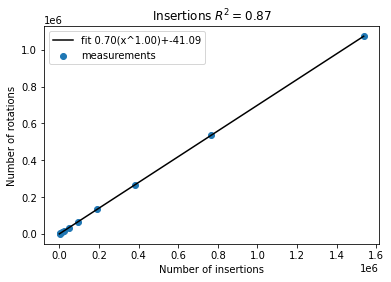

In [39]:
# read excel
rotations_count = pd.read_excel("excels\\rotations experiment avl tree.xlsx")
# fit setup
n_values = np.array([1500*(2**i) for i in range(1,11)])
xes = np.linspace(0, n_values[-1], 100)
power_func = lambda x, a0, a1, p: a0 + a1*(x**p)
# fit insertions
params, cov = fit(power_func, n_values, rotations_count.Insert)
plt.scatter(n_values, rotations_count.Insert, label="measurements")
plt.plot(xes, power_func(xes, *params), label=f"fit {params[1]:.2f}(x^{params[2]:.2f})+{params[0]:.2f}", color="k")
R2=R_sq(rotations_count.Insert, power_func(rotations_count.Insert, *params))
plt.title(f"Insertions $R^2 = ${R2:.2f}")
ax = plt.gca()
ax.ticklabel_format(axis='both', scilimits=[-3, 3])
plt.xlabel("Number of insertions")
plt.ylabel("Number of rotations")
plt.legend()
# Uncomment to save
plt.savefig("fits\\Q1_insert.png", dpi=300, facecolor="white", transparent="false")
with open("fits\\Q1_insert", 'w') as f:
    f.writelines([
        "Insertions experiment\n\n",
        f"fitted function is a0+a1(x^p)\n",
        f"R^2 = {R2}\n\n",
        f"parameters result are\n",
        f"a0 = {params[0]}\n",
        f"a1 = {params[1]}\n",
        f"p = {params[2]}\n\n",
        "covariance matrix:\n",
        cov.__repr__()
    ])
plt.show()

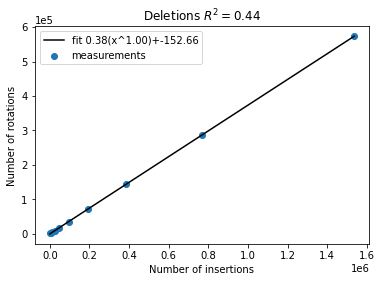

In [40]:
# fit deletions
params, cov = fit(power_func, n_values, rotations_count.Delete)
plt.scatter(n_values, rotations_count.Delete, label="measurements")
plt.plot(xes, power_func(xes, *params), label=f"fit {params[1]:.2f}(x^{params[2]:.2f})+{params[0]:.2f}", color="k")
R2=R_sq(rotations_count.Delete, power_func(rotations_count.Delete, *params))
plt.title(f"Deletions $R^2 = ${R2:.2f}")
plt.legend()
ax = plt.gca()
ax.ticklabel_format(axis='both', scilimits=[-3, 3])
plt.xlabel("Number of insertions")
plt.ylabel("Number of rotations")
# Uncomment to save
plt.savefig("fits\\Q1_delete.png", dpi=300, facecolor="white", transparent="false")
with open("fits\\Q1_delete", 'w') as f:
    f.writelines([
        "Deletions experiment\n\n",
        f"fitted function is a0+a1(x^p)\n",
        f"R^2 = {R2}\n\n",
        f"parameters result are\n",
        f"a0 = {params[0]}\n",
        f"a1 = {params[1]}\n",
        f"p = {params[2]}\n\n",
        "covariance matrix:\n",
        cov.__repr__()
    ])
plt.show()

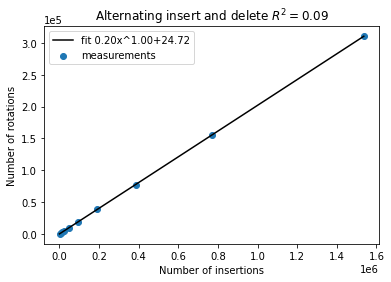

In [41]:
# fit alternating insert and delete
params, cov = fit(power_func, n_values, rotations_count.Alternating)
plt.scatter(n_values, rotations_count.Alternating, label="measurements")
plt.plot(xes, power_func(xes, *params), label=f"fit {params[1]:.2f}x^{params[2]:.2f}+{params[0]:.2f}", color="k")
R2=R_sq(rotations_count.Alternating, power_func(rotations_count.Alternating, *params))
plt.title(f"Alternating insert and delete $R^2 = ${R2:.2f}")
plt.legend()
ax = plt.gca()
ax.ticklabel_format(axis='both', scilimits=[-3, 3])
plt.xlabel("Number of insertions")
plt.ylabel("Number of rotations")
# Uncomment to save
plt.savefig("fits\\Q1_alter.png", dpi=300, facecolor="white", transparent="false")
with open("fits\\Q1_alter", 'w') as f:
    f.writelines([
        "Alternating insert and delete experiment\n\n",
        f"fitted function is a0+a1(x^p)\n",
        f"R^2 = {R2}\n\n",
        f"parameters result are\n",
        f"a0 = {params[0]}\n",
        f"a1 = {params[1]}\n",
        f"p = {params[2]}\n\n",
        "covariance matrix:\n",
        cov.__repr__()
    ])
plt.show()

### Q2

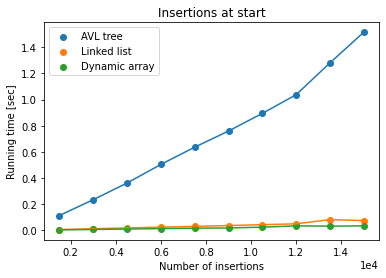

In [56]:
tree_res = pd.read_excel("excels\\AVL tree time experiment.xlsx")
linked_res = pd.read_excel("excels\\linked list time experiment.xlsx")
array_res = pd.read_excel("excels\\Dynamic array time experiment.xlsx")
n_values = np.array([1500*i for i in range(1,11)])
xes = np.arange(0, n_values[-1])

plt.scatter(n_values, tree_res.Start, label="AVL tree")
plt.plot(n_values, tree_res.Start)
plt.scatter(n_values, linked_res.Start, label="Linked list")
plt.plot(n_values, linked_res.Start)
plt.scatter(n_values, array_res.Start, label="Dynamic array")
plt.plot(n_values, array_res.Start)
plt.legend()
plt.title("Insertions at start")
ax = plt.gca()
ax.ticklabel_format(axis='both', scilimits=[-3, 3])
plt.xlabel("Number of insertions")
plt.ylabel("Running time [sec]")
plt.savefig("fits\\Q2_start.png", dpi=300, facecolor="white", transparent="false")
plt.show()

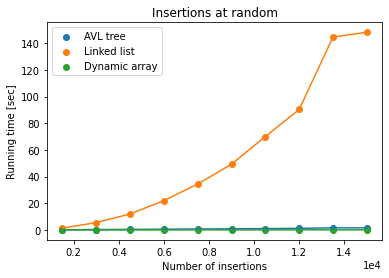

In [58]:
plt.scatter(n_values, tree_res.Random, label="AVL tree")
plt.plot(n_values, tree_res.Random)
plt.scatter(n_values, linked_res.Random, label="Linked list")
plt.plot(n_values, linked_res.Random)
plt.scatter(n_values, array_res.Random, label="Dynamic array")
plt.plot(n_values, array_res.Random)
plt.legend()
plt.title("Insertions at random")
ax = plt.gca()
ax.ticklabel_format(axis='both', scilimits=[-3, 3])
plt.xlabel("Number of insertions")
plt.ylabel("Running time [sec]")
plt.savefig("fits\\Q2_random.png", dpi=300, facecolor="white", transparent="false")
plt.show()

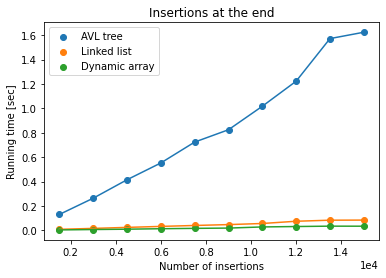

In [59]:
plt.scatter(n_values, tree_res.End, label="AVL tree")
plt.plot(n_values, tree_res.End)
plt.scatter(n_values, linked_res.End, label="Linked list")
plt.plot(n_values, linked_res.End)
plt.scatter(n_values, array_res.End, label="Dynamic array")
plt.plot(n_values, array_res.End)
plt.legend()
plt.title("Insertions at the end")
ax = plt.gca()
ax.ticklabel_format(axis='both', scilimits=[-3, 3])
plt.xlabel("Number of insertions")
plt.ylabel("Running time [sec]")
plt.savefig("fits\\Q2_end.png", dpi=300, facecolor="white", transparent="false")
plt.show()